In [69]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

The goal of this regression exercise is to see if we can see a difference between the correlation of Unemployment and Inflation using a linear regression and a robust regression.

In [84]:
df = pd.read_csv('index.csv')


In [85]:
df['DateTime'] = pd.to_datetime(df.Year*10000+df.Month*100+df.Day,format='%Y%m%d')
#Converting First 3 columns in Data Set to datetime

In [86]:
df.columns

Index(['Year', 'Month', 'Day', 'Federal Funds Target Rate',
       'Federal Funds Upper Target', 'Federal Funds Lower Target',
       'Effective Federal Funds Rate', 'Real GDP (Percent Change)',
       'Unemployment Rate', 'Inflation Rate', 'DateTime'],
      dtype='object')

In [87]:
df = df.rename(columns={'Inflation Rate': 'inflation', 'Unemployment Rate': 'unemployment'})

In [88]:
df = df[np.isfinite(df['inflation'])]

In [89]:
df

,Year,Month,Day,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),unemployment,inflation,DateTime
42,1958,1,1,NaN,NaN,NaN,2.72,-10.0,5.8,3.2,1958-01-01
43,1958,2,1,NaN,NaN,NaN,1.67,NaN,6.4,3.2,1958-02-01
44,1958,3,1,NaN,NaN,NaN,1.20,NaN,6.7,2.8,1958-03-01
45,1958,4,1,NaN,NaN,NaN,1.26,2.6,7.4,2.4,1958-04-01
46,1958,5,1,NaN,NaN,NaN,0.63,NaN,7.4,2.4,1958-05-01
47,1958,6,1,NaN,NaN,NaN,0.93,NaN,7.3,2.1,1958-06-01
48,1958,7,1,NaN,NaN,NaN,0.68,9.6,7.5,2.4,1958-07-01
49,1958,8,1,NaN,NaN,NaN,1.53,NaN,7.4,2.1,1958-08-01
50,1958,9,1,NaN,NaN,NaN,1.76,NaN,7.1,1.7,1958-09-01
51,1958,10,1,NaN,NaN,NaN,1.80,9.7,6.7,1.7,1958-10-01


In [75]:
df.drop(df.columns[[0,1,2,3,4,5,6,7]],axis=1, inplace=True)
#Dropping columns of no interest

In [83]:
df

,unemployment,inflation,DateTime
DateTime,,,
1958-01-01,5.8,3.2,1958-01-01
1958-02-01,6.4,3.2,1958-02-01
1958-03-01,6.7,2.8,1958-03-01
1958-04-01,7.4,2.4,1958-04-01
1958-05-01,7.4,2.4,1958-05-01
1958-06-01,7.3,2.1,1958-06-01
1958-07-01,7.5,2.4,1958-07-01
1958-08-01,7.4,2.1,1958-08-01
1958-09-01,7.1,1.7,1958-09-01


In [76]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

X = pd.DataFrame(df.unemployment)
y =  pd.DataFrame(df.inflation)

lm.fit(X,y)
print('coefficients: ' + str(lm.coef_))
print('intercept: ' + str(lm.intercept_))
print('score: ' + str(lm.score(X,y)))

coefficients: [[ 0.34040902]]
intercept: [ 1.66748109]
score: 0.0426511843569


There surprisngly seems to be little correlation between inflation and unemployment either negative or positive. Let's graph the data to see.

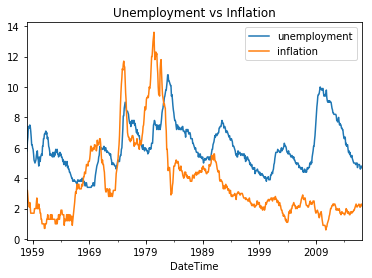

In [77]:
df.index = df.DateTime
df[['unemployment', 'inflation']].plot()
plt.title('Unemployment vs Inflation')
plt.show()

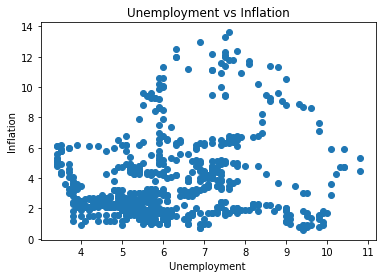

In [78]:
plt.scatter(x = df.unemployment, y = df.inflation)
plt.title('Unemployment vs Inflation')
plt.xlabel('Unemployment ')
plt.ylabel('Inflation')
plt.show()

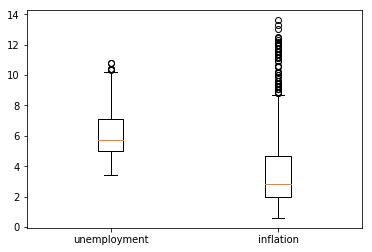

In [79]:
plt.boxplot([df.unemployment, df.inflation])
plt.xticks([1,2], ['unemployment','inflation'])
plt.show()

Our inflation data has many, many more outliers than our unemployment data. Our Robust regression should look to minimize the impact these outliers have on our correlation.

In [80]:
from sklearn.linear_model import HuberRegressor
hr = HuberRegressor()

hr.fit(X,y)
print('coefficients: ' + str(hr.coef_))
print('intercept: ' + str(hr.intercept_))
print('score: ' + str(hr.score(X,y)))

coefficients: [ 0.19618578]
intercept: 2.00053494569
score: -0.00945422325222


C:\Users\Connor\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


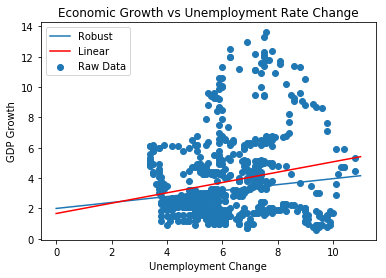

In [82]:
robust = [hr.coef_[0] * i + hr.intercept_ for i in range(0, 12)]
linear = [lm.coef_[0] * i + lm.intercept_ for i in range(0, 12)]

plt.scatter(x = df.unemployment, y =df.inflation, label='Raw Data')
plt.plot(range(0,12), robust, label='Robust')
plt.plot(range(0,12), linear, 'r', label='Linear')
plt.legend()
plt.title('Economic Growth vs Unemployment Rate Change')
plt.xlabel('Unemployment Change')
plt.ylabel('GDP Growth')
plt.show()

From looking at the graphs and especially the best fit line presented in the last graph it looks that unemployment and inflation don't seem to heavily correlated either positively or negatively. When we used our robust regression rather than linear we see even less of a correlation between the two. Our inflation information seems to have many outliers and not follow a particular pattern whether unemployment is currently high or low.